# Dataset 3#

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# NOTE: Install pandas first, for loading csv data
import pandas as pd

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## Part 1. Feature Preprocessing ##

In [2]:
def plotPred(test_target, pred_target):
    line1 = np.linspace(1,np.max([test_target,pred_target]),10)
    line2 = np.linspace(np.min(pred_target),np.max(pred_target),10)
    
    plt.figure(figsize=(8,6)) 
    plt.scatter(test_target,pred_target)
    plt.plot(line1, line1,'r--')
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.show()

    # residuals
    plt.figure(figsize=(8,6))
    residual = np.array(test_target) - np.array(pred_target)
    plt.scatter(pred_target,residual)
    plt.plot(line2, np.linspace(1,1,10),'r--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residual")
    plt.show()

In [3]:
insur_dataset = pd.read_csv('insurance_data.csv')
insur_dataset.columns = ['ft1','ft2','ft3','ft4','ft5','ft6','charges']
print (insur_dataset)

      ft1     ft2  ft3     ft4  ft5        ft6      charges
0      19  27.900    0  female  yes  southwest  16884.92400
1      18  33.770    1    male   no  southeast   1725.55230
2      28  33.000    3    male   no  southeast   4449.46200
3      33  22.705    0    male   no  northwest  21984.47061
4      32  28.880    0    male   no  northwest   3866.85520
5      31  25.740    0  female   no  southeast   3756.62160
6      46  33.440    1  female   no  southeast   8240.58960
7      37  27.740    3  female   no  northwest   7281.50560
8      37  29.830    2    male   no  northeast   6406.41070
9      60  25.840    0  female   no  northwest  28923.13692
10     25  26.220    0    male   no  northeast   2721.32080
11     62  26.290    0  female  yes  southeast  27808.72510
12     23  34.400    0    male   no  southwest   1826.84300
13     56  39.820    0  female   no  southeast  11090.71780
14     27  42.130    0    male  yes  southeast  39611.75770
15     19  24.600    1    male   no  sou

### (a) Feature Encoding: ###

In [4]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer

ftOHE=insur_dataset[['ft1','ft2','ft3','ft4','ft5','ft6']]
y=insur_dataset['charges']

ct = ColumnTransformer(
    [('oh_enc', OneHotEncoder(sparse=True), [3,4,5]),],  # the column numbers I want to apply this to
    remainder='passthrough'  # This leaves the rest of my columns in place
)

X_a = ct.fit_transform(ftOHE)
# print(X_a.shape)
# print(X_a)
# print(X_a[0])

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

reg = LinearRegression(fit_intercept = False)

# 10-fold cross validation for scalar encoding dataset
scores = cross_validate(reg, X_a, y, scoring='neg_mean_squared_error',
                        cv=10, return_train_score=True)
predict = cross_val_predict(reg, X_a, y, cv=10)
test_score = np.sqrt(np.mean(-scores['test_score']))
train_score = np.sqrt(np.mean(-scores['train_score']))
print('RMSE of training dateset: ', train_score)
print('RMSE of testing dateset: ', test_score)

RMSE of training dateset:  6039.342370581926
RMSE of testing dateset:  6063.643882478563


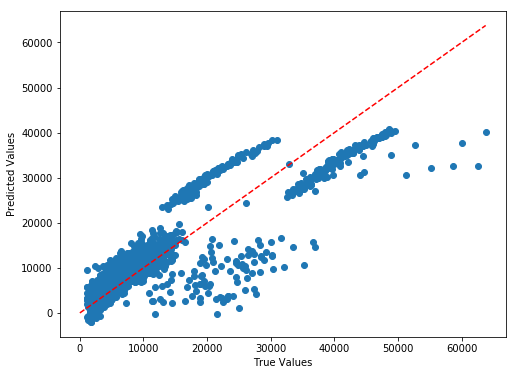

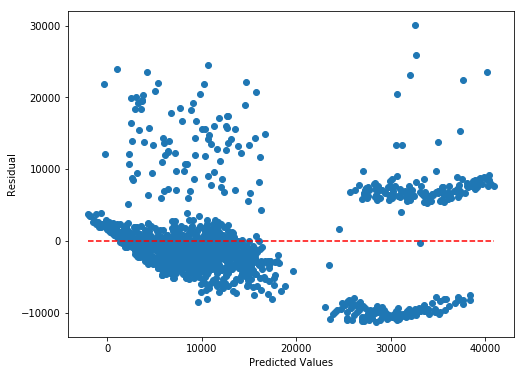

In [6]:
plotPred(y,predict)

### (b) Standardization: ###

In [7]:
from sklearn.preprocessing import StandardScaler
ct2 = ColumnTransformer(
    [('oh_enc', StandardScaler(), [8,9,10]),],  # the column numbers I want to apply this to
    remainder='passthrough'  # This leaves the rest of my columns in place
)

X_b = ct2.fit_transform(X_a)

# print(y)
# print(X_b.shape)
# print(X_b)
# print(X_b[0])


In [8]:
# 10-fold cross validation for scalar encoding dataset
scores = cross_validate(reg, X_b, y, scoring='neg_mean_squared_error',
                        cv=10, return_train_score=True)
predict = cross_val_predict(reg, X_b, y, cv=10)
test_score = np.sqrt(np.mean(-scores['test_score']))
train_score = np.sqrt(np.mean(-scores['train_score']))
print('RMSE of training dateset: ', train_score)
print('RMSE of testing dateset: ', test_score)

RMSE of training dateset:  6039.568676068135
RMSE of testing dateset:  6081.959007332843


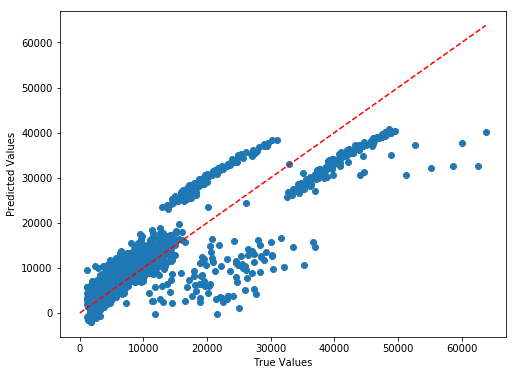

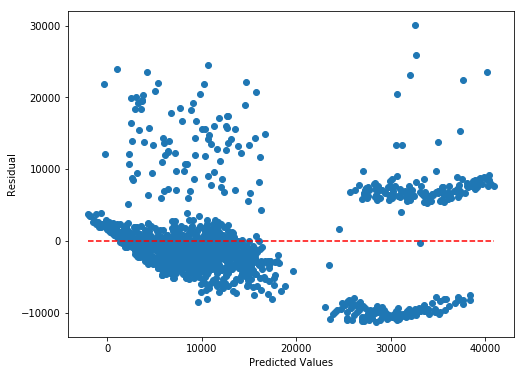

In [9]:
plotPred(y,predict)

### (c) Divide & Standardize: ###

In [10]:
def changeRange(a):
    if (a < 30):
        a = 1
    elif (a < 50):
        a = 2
    else:
        a = 3
    return a

X_c = ftOHE.copy()
X_c.loc[:,'ft1'] = X_c.loc[:,'ft1'].apply(changeRange)

ct3 = ColumnTransformer(
    [('oh_enc', OneHotEncoder(sparse=True), [3,4,5]),],  # the column numbers I want to apply this to
    remainder='passthrough'  # This leaves the rest of my columns in place
)
ct4 = ColumnTransformer(
    [('oh_enc', StandardScaler(), [9,10]),],  # the column numbers I want to apply this to
    remainder='passthrough'  # This leaves the rest of my columns in place
)

X_c = ct3.fit_transform(X_c)
X_c = ct4.fit_transform(X_c)
# print(X_c.shape)
# print(X_c)
# print(X_c[0:20])

In [11]:
# 10-fold cross validation for scalar encoding dataset
scores = cross_validate(reg, X_c, y, scoring='neg_mean_squared_error',
                        cv=10, return_train_score=True)
predict = cross_val_predict(reg, X_c, y, cv=10)
test_score = np.sqrt(np.mean(-scores['test_score']))
train_score = np.sqrt(np.mean(-scores['train_score']))
print('RMSE of training dateset: ', train_score)
print('RMSE of testing dateset: ', test_score)

RMSE of training dateset:  6176.871665480102
RMSE of testing dateset:  6218.472355881419


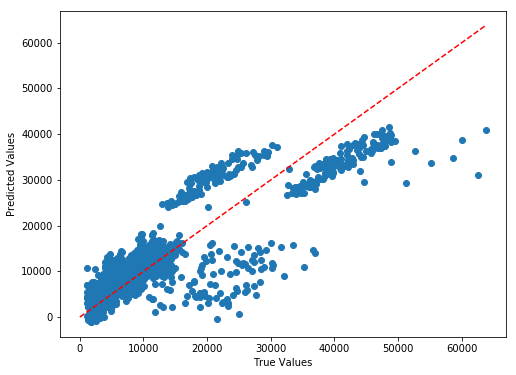

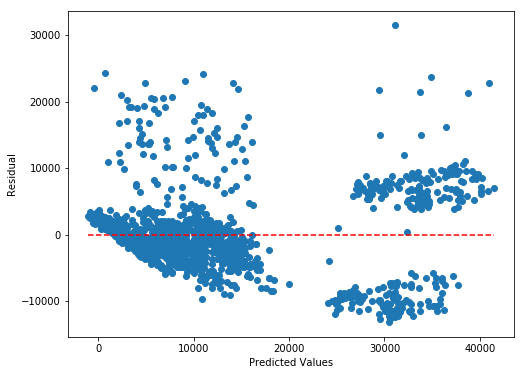

In [12]:
plotPred(y,predict)

## Part 2. Correlation Exploration ## 

In [13]:
def plotCorr(X):
    # ft1
#     x1 = X.loc[:,'ft1']
    ft5_no = X.loc[ X['ft5'] == 'no' ,['ft1','ft2','charges']]
    ft5_yes = X.loc[ X['ft5'] == 'yes' ,['ft1','ft2','charges']]
    
    x1 = ft5_no.loc[:,'ft1']
    y1 = ft5_no.loc[:,'charges']
    x2 = ft5_yes.loc[:,'ft1']
    y2 = ft5_yes.loc[:,'charges']
    
    plt.figure(figsize=(8,6)) 
    plt.scatter(x1,y1,color = 'r')
    plt.scatter(x2,y2,color = 'g')
    plt.xlabel("ft1")
    plt.ylabel("charges")
    plt.show()

    # ft2
    x3 = ft5_no.loc[:,'ft2']
    y3 = ft5_no.loc[:,'charges']
    x4 = ft5_yes.loc[:,'ft2']
    y4 = ft5_yes.loc[:,'charges']
    
    plt.figure(figsize=(8,6)) 
    plt.scatter(x3,y3,color = 'r')
    plt.scatter(x4,y4,color = 'g')
    plt.xlabel("ft2")
    plt.ylabel("charges")
    plt.show()

### Convert Categorical Features###

In [14]:
# # Scalar encoding for each catagorical variable ft4 ft5 ft6
ft4_label, ft4_unique = pd.factorize(insur_dataset['ft4'],sort=True)
ft5_label, ft5_unique = pd.factorize(insur_dataset['ft5'],sort=True)
ft6_label, ft6_unique = pd.factorize(insur_dataset['ft6'],sort=True)

# Create Scalar encoded dataset (All coding start with 1)
insur_dataset_scalar = insur_dataset.copy()
insur_dataset_scalar['ft4'] = ft4_label+1
insur_dataset_scalar['ft5'] = ft5_label+1
insur_dataset_scalar['ft6'] = ft6_label+1

# print(insur_dataset_scalar)

In [15]:
from sklearn.feature_selection import f_regression, mutual_info_regression

# Question????? 5 features or 6 features?????
features = ["ft1","ft2","ft3","ft4","ft5","ft6"]
X = insur_dataset_scalar[features]
y = insur_dataset_scalar["charges"]

f_F, f_p = f_regression(X, y)
print('f_F: ',f_F,'\n\nf_p: ',f_p,'\n')

# best three
best_index = list(f_F.argsort()[-2:][::-1])
best_feature = []
for x in best_index:
    best_feature.append(features[x])
print('The best two features: ',best_feature)

f_F:  [1.31174013e+02 5.47093081e+01 6.20603705e+00 4.39970170e+00
 2.17761487e+03 5.14943381e-02] 

f_p:  [4.88669333e-029 2.45908554e-013 1.28521285e-002 3.61327210e-002
 8.27143584e-283 8.20517836e-001] 

The best two features:  ['ft5', 'ft1']


### Plot Charge VS FT1 & FT2 ###

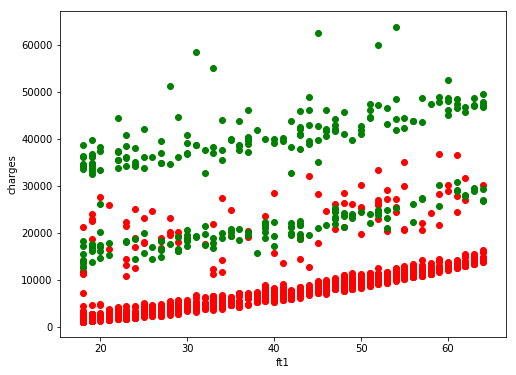

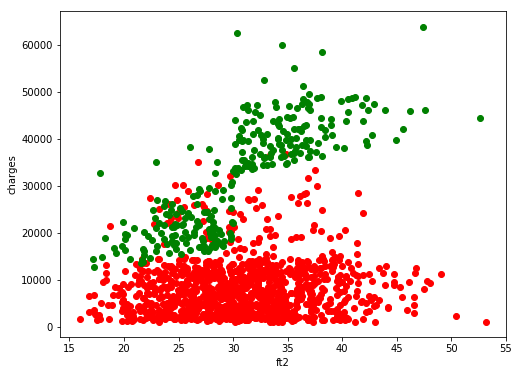

In [16]:
plotCorr(insur_dataset)

## Part 3. Modify the target variable ## 

### Feature Preprocessing ###

In [17]:
ftOHE=insur_dataset[['ft1','ft2','ft3','ft4','ft5','ft6']]
y_log=insur_dataset['charges'].copy()
y_log = y_log.apply(np.log)

ct = ColumnTransformer(
    [('oh_enc', OneHotEncoder(sparse=True), [3,4,5]),],  # the column numbers I want to apply this to
    remainder='passthrough'  # This leaves the rest of my columns in place
)

X_a = ct.fit_transform(ftOHE)
# print(X_a.shape)
# print(X_a)
# print(X_a[0])

In [18]:
reg = LinearRegression(fit_intercept = False)

# 10-fold cross validation for scalar encoding dataset
scores = cross_validate(reg, X_a, y_log, scoring='neg_mean_squared_error',
                        cv=10, return_train_score=True)
predict = cross_val_predict(reg, X_a, y_log, cv=10)
predict_actual = np.exp(predict)
error = np.sqrt(np.mean(np.square(predict_actual-y) ))
# test_score = np.sqrt(np.mean(-scores['test_score']))
# train_score = np.sqrt(np.mean(-scores['train_score']))
# print('RMSE of training dateset: ', train_score)
print('RMSE of testing dateset: ', error)

RMSE of testing dateset:  8437.227867244876


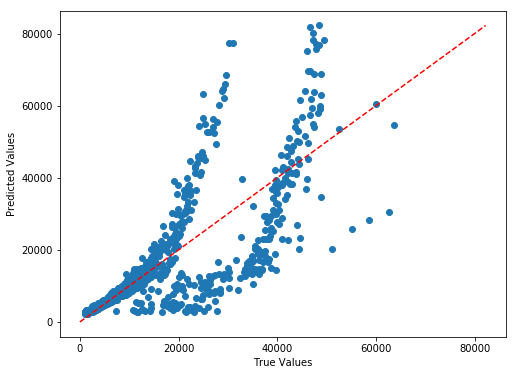

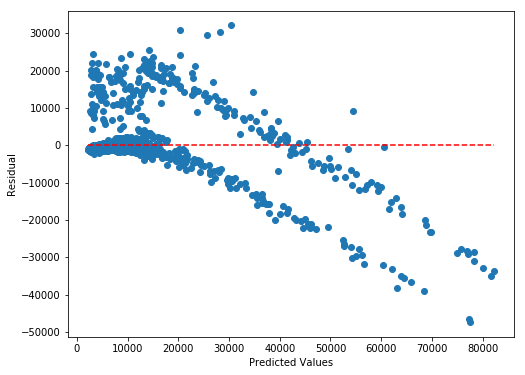

In [19]:
plotPred(y,predict_actual)

### Correlation Exploration ###

In [20]:
features = ["ft1","ft2","ft3","ft4","ft5","ft6"]
X = insur_dataset_scalar[features]

# y_log
f_F, f_p = f_regression(X, y_log)
print('f_F: ',f_F,'\n\nf_p: ',f_p,'\n')

# best three
best_index = list(f_F.argsort()[-2:][::-1])
best_feature = []
for x in best_index:
    best_feature.append(features[x])
print('The best two features: ',best_feature)

f_F:  [5.15977081e+02 2.39364692e+01 3.57046705e+01 4.23764137e-02
 1.06212392e+03 2.43916473e+00] 

f_p:  [7.47738522e-097 1.11667665e-006 2.94069066e-009 8.36935289e-001
 6.30764636e-172 1.18576054e-001] 

The best two features:  ['ft5', 'ft1']


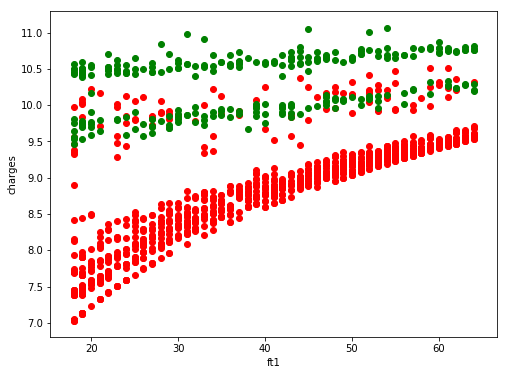

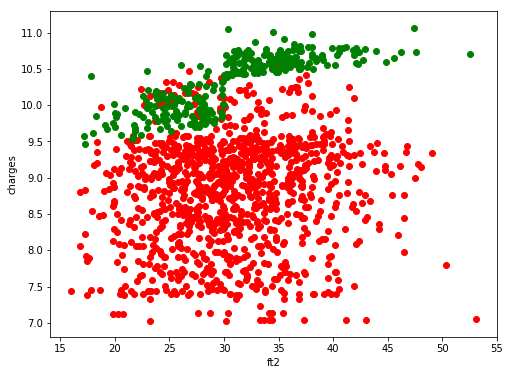

In [21]:
insur_dataset_log = insur_dataset.copy()
insur_dataset_log['charges'] = y_log
plotCorr(insur_dataset_log)

# Bonus questions: #